In [7]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pickle

In [8]:
# loading the dataset

file_path = r"../data.xlsx"

data = pd.read_excel(file_path)
data.head()

,year,trade_deficit,covid_dummy,gdp_canada,gdp_us,nominal_exchange_rate,deflator_canada,deflator_usa,cpi_canada,cpi_usa,...,global_econ_policy_uncertainty,us_econ_policy_uncertainty,m2_us,m2_canada,interest_rate_canada,ppi_canada,ppi_us,interest_rate_us,fdi_us,migration_fear_us
0,2003,-712.331648,0,314686.928702,15162760.0,0.761731,79.575453,77.639,81.538056,185.500,...,70.478538,90.34359,6067.3,567295,4.729048,80.021339,139.5,0.98,1658275,88.290131
1,2004,-851.752241,0,352045.696940,15670880.0,0.820412,82.280018,79.939,83.276271,191.700,...,64.967186,66.53288,6418.3,603920,4.320476,83.115497,150.2,2.16,1830644,95.930206
2,2005,-953.674088,0,381695.652174,16136734.0,0.860956,85.601587,82.571,85.014485,198.100,...,60.622293,70.02676,6681.9,642923,4.041000,85.356095,163.0,4.16,2007151,90.102013
3,2006,-888.751877,0,390398.022893,16561866.0,0.867152,86.896102,84.770,86.436661,203.100,...,56.872640,51.03904,7071.6,678248,3.966316,88.236863,165.6,5.24,2255955,116.371735
4,2007,-781.766393,0,458809.799421,16915191.0,0.997904,90.129249,86.993,88.490914,211.445,...,95.535370,116.99090,7471.6,739943,4.015789,87.810083,178.6,4.24,2463600,112.055168


In [10]:
# dropping the Y column

subset_df = data.set_index('year')
subset_df.drop(['trade_deficit'], axis=1, inplace=True)

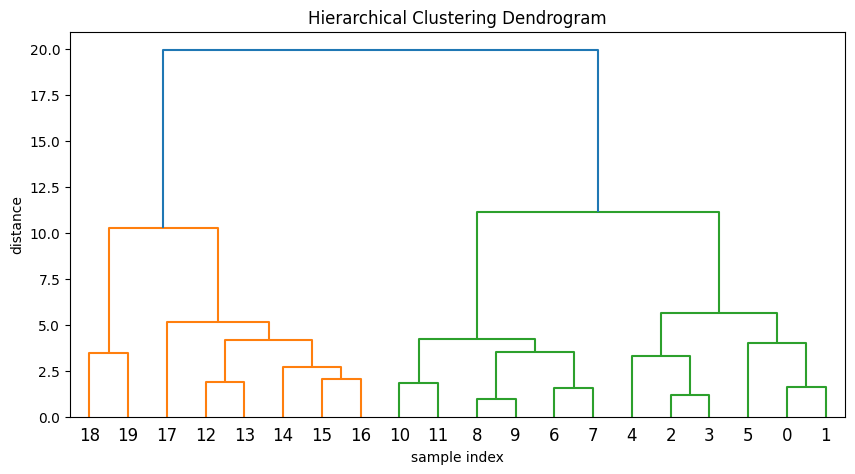

In [12]:
# Assuming you have loaded your dataset into a pandas DataFrame named "data"
# Drop any non-numeric columns
numeric_data = subset_df.select_dtypes(include=[np.number]).dropna()

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(numeric_data)

# K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)

# Hierarchical clustering
Z = linkage(data_scaled, method='ward')

# Plotting the dendrogram
plt.figure(figsize=(10, 5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(Z)
plt.show()

# Assigning clusters using hierarchical clustering
max_d = 8
hierarchical_clusters = fcluster(Z, max_d, criterion='distance')

In [13]:
# Hierarchical clustering with different linkage criteria
model_ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
clusters_ward = model_ward.fit_predict(data)

model_complete = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
clusters_complete = model_complete.fit_predict(data)

model_average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
clusters_average = model_average.fit_predict(data)

model_single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
clusters_single = model_single.fit_predict(data)

print("Ward linkage:", clusters_ward)
print("Complete linkage:", clusters_complete)
print("Average linkage:", clusters_average)
print("Single linkage:", clusters_single)

Ward linkage: [2 2 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0]
Complete linkage: [0 0 0 0 0 0 0 0 0 0 2 2 2 2 1 1 1 1 1 1]
Average linkage: [1 1 1 1 1 1 1 1 1 1 2 2 2 2 0 0 0 0 0 0]
Single linkage: [2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 1 1]


clustered by the time trend

In [15]:
def detrend_variable(variable):
    model = LinearRegression()
    X = pd.to_numeric(variable.index).values.reshape(-1, 1)
    model.fit(X, variable)
    detrended_variable = variable - model.predict(X)
    return detrended_variable, model

# Apply detrend_variable function to each column
detrended_and_models = subset_df.apply(detrend_variable)

# Separate detrended variables and models
detrended_data = detrended_and_models.apply(lambda x: x[0])

In [ ]:
# creating the models dictionary for saving
models = {}

for column_name, (detrended, model) in detrended_and_models.items():
    models[column_name] = model

In [19]:
# Hierarchical clustering with different linkage criteria
model_ward = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')

model_complete = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')
clusters_complete = model_complete.fit_predict(detrended_data)

model_average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
clusters_average = model_average.fit_predict(detrended_data)
cluster_model = model_average.fit(detrended_data)


model_single = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')
clusters_single = model_single.fit_predict(detrended_data)

print("Ward linkage:", clusters_ward)
print("Complete linkage:", clusters_complete)
print("Average linkage:", clusters_average)
print("Single linkage:", clusters_single)

Ward linkage: [2 2 2 2 2 2 2 2 1 1 1 1 1 1 0 0 0 0 0 0]
Complete linkage: [0 0 0 0 0 2 1 1 1 1 1 1 1 1 2 2 0 2 0 0]
Average linkage: [0 0 0 0 0 2 1 1 1 1 1 1 1 1 2 2 0 2 0 0]
Single linkage: [0 0 0 0 0 2 1 1 1 1 1 1 1 1 2 2 0 2 0 0]


In [20]:
labels = cluster_model.labels_
cluster_centers = np.zeros((cluster_model.n_clusters, detrended_data.shape[1]))
for i in range(cluster_model.n_clusters):
    cluster_centers[i] = detrended_data[labels == i].mean(axis=0)

In [22]:
data['ward_cluster_trend_corrected'] = clusters_ward

In [23]:
save_path = r"./data/1_end.xlsx"
dictionary_save_path = r"./models/detrend_model_dict.pkl"
clustrer_centers_save_path = r"./models/clustrer_model.pkl"

In [24]:
data.to_excel(save_path, index=False)

In [25]:
with open(dictionary_save_path, 'wb') as f:
    pickle.dump(models, f)

In [26]:
with open(clustrer_centers_save_path, 'wb') as f:
    pickle.dump(cluster_centers.T, f)

In [ ]:
# testing the clustering predict logic

model_average = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')
clusters_average = model_average.fit_predict(detrended_data)
cluster_model = model_average.fit(detrended_data)

labels = cluster_model.labels_
cluster_centers = np.zeros((cluster_model.n_clusters, detrended_data.shape[1]))
for i in range(cluster_model.n_clusters):
    cluster_centers[i] = detrended_data[labels == i].mean(axis=0)
models['cluster_centers'] = cluster_centers


for index, row in detrended_data.iterrows():
    new_point = row.values.reshape(1, -1)
    distances = [np.linalg.norm(new_point - center) for center in cluster_centers]
    predicted_cluster = np.argmin(distances)

    print("Predicted cluster label for the new point:", predicted_cluster)

NameError: name 'AgglomerativeClustering' is not defined